# Self Organising Map Challenge

## The Kohonen Network

The Kohonen Self Organising Map (SOM) provides a data visualization technique which helps to understand high dimensional data by reducing the dimensions of data to a map. SOM also represents clustering concept by grouping similar data together.

Unlike other learning technique in neural networks, training a SOM requires no target vector. A SOM learns to classify the training data without any external supervision.

![Network](http://www.pitt.edu/~is2470pb/Spring05/FinalProjects/Group1a/tutorial/kohonen1.gif)

### Structure
A network has a width and a height that descibes the grid of nodes.  For example, the grid may be 4x4, and so there would be 16 nodes.

Each node has a weight for each value in the input vector.  A weight is simply a float value that the node multiplies the input value by to determine how influential it is (see below)

Each node has a set of weights that match the size of the input vector.  For example, if the input vector has 10 elements, each node would have 10 weights.

### Training 
To train the network

1. Each node's weights are initialized.
2. We enumerate through the training data for some number of iterations (repeating if necessary).  The current value we are training against will be referred to as the `current input vector`
3. Every node is examined to calculate which one's weights are most like the input vector. The winning node is commonly known as the Best Matching Unit (BMU).
4. The radius of the neighbourhood of the BMU is now calculated. This is a value that starts large, typically set to the 'radius' of the lattice,  but diminishes each time-step. Any nodes found within this radius are deemed to be inside the BMU's neighbourhood.
5. Each neighbouring node's (the nodes found in step 4) weights are adjusted to make them more like the input vector. The closer a node is to the BMU, the more its weights get altered.
6. Go to step 2 until we've completed N iterations.
    

### Calculating the Best Matching Unit (BMU)

To determine the best matching unit, one method is to iterate through all the nodes and calculate the Euclidean distance between each node's weight vector and the current input vector. The node with a weight vector closest to the input vector is tagged as the BMU.

The Euclidean distance $\mathsf{distance}_{i}$ (from the input vector $V$ to the $i$th node's weights $W_i$)is given as (using Pythagoras):

$$ \mathsf{distance}_{i}=\sqrt{\sum_{k=0}^{k=n}(V_k - W_{i_k})^2}$$

where V is the current input vector and $W_i$ is the node's weight vector.  $n$ is the size of the input & weight vector.

*Note*: $V$ and $W$ are vectors.  $V$ is the input vector, and $W_i$ is the weight vector of the $i$th node.  $V_k$ and $W_{i_k}$ represent the $k$'th value within those vectors.  

The BMU is the node with the minimal distance for the current input vector

### Calculating the Neighbourhood Radius

The next step is to calculate which of the other nodes are within the BMU's neighbourhood. All these nodes will have their weight vectors altered.

First we calculate what the radius of the neighbourhood should be and then use Pythagoras to determine if each node is within the radial distance or not.

A unique feature of the Kohonen learning algorithm is that the area of the neighbourhood shrinks over time. To do this we use the exponential decay function:

Given a desired number of training iterations $n$:
$$n_{\mathsf{max iterations}} = 100$$

Calculate the radius $\sigma_t$ at iteration number $t$:

$$\sigma_t = \sigma_0 \exp\left(- \frac{t}{\lambda} \right) \qquad t = 1,2,3,4... $$

Where $\sigma_0$ denotes the neighbourhood radius at iteration $t=0$, $t$ is the current iteration. We define $\sigma_0$ (the initial radius) and $\lambda$ (the time constant) as below:

$$\sigma_0 = \frac{\max(width,height)}{2} \qquad \lambda = \frac{n_{\mathsf{max iterations}}}{\log(\sigma_0)} $$

Where $width$ & $height$ are the width and height of the grid.

### Calculating the Learning Rate

We define the initial leanring rate $\alpha_0$ at iteration $t = 0$ as:
$$\alpha_0 = 0.1$$

So, we can calculate the learning rate at a given iteration t as:

$$\alpha_t = \alpha_0 \exp \left(- \frac{t}{\lambda} \right) $$

where $t$ is the iteration number, $\lambda$ is the time constant (calculated above)
        
### Calculating the Influence

As well as the learning rate, we need to calculate the influence $\theta_t$ of the learning/training at a given iteration $t$.  

So for each node, we need to caclulate the euclidean distance $d_i$ from the BMU to that node.  Similar to when we calculate the distance to find the BMU, we use Pythagoras.  The current ($i$th) node's x position is given by $x(W_i)$, and the BMU's x position is, likewise, given by $x(Z)$.  Similarly, $y()$ returns the y position of a node.

$$ d_{i}=\sqrt{(x(W_i) - x(Z))^2 + (y(W_i) - y(Z))^2} $$

Then, the influence decays over time according to:

$$\theta_t = \exp \left( - \frac{d_{i}^2}{2\sigma_t^2} \right) $$

Where $\sigma_t$ is the neighbourhood radius at iteration $t$ as calculated above. 

Note: You will need to come up with an approach to x() and y().


### Updating the Weights

To update the weights of a given node, we use:

$$W_{i_{t+1}} = W_{i_t} + \alpha_t \theta_t (V_t - W_{i_t})$$
        
So $W_{i_{t+1}}$ is the new value of the weight for the $i$th node, $V_t$ is the current value of the training data, $W_{i_t}$ is the current weight and $\alpha_t$ and $\theta_t$ are the learning rate and influence calculated above.

*Note*: the $W$ and $V$ are vectors 

### Example 10x10 network after 100 iterations

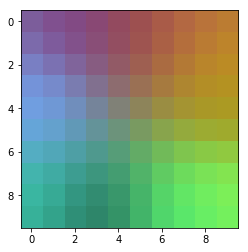

In [147]:
import matplotlib.pyplot as plt
plt.imshow(image_data)

### Example 100x100 network after 1000 iterations

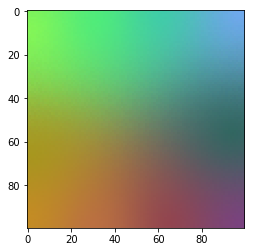

In [141]:
import matplotlib.pyplot as plt
plt.imshow(image_data)

## Challenge

Sam has written an implementation of a Self Organising Map. Consider the following criteria when assessing Sam's code:

- Could the code be made more efficient? A literal interpretation of the instructions above is not necessary.
- Is the code best structured for later use by other developers and in anticipation of productionisation?
- How would you approach productionising this application?
- Anything else you think is relevant.

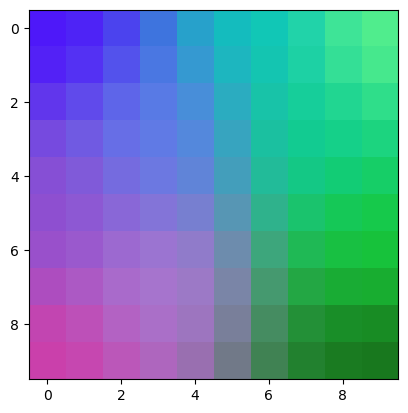

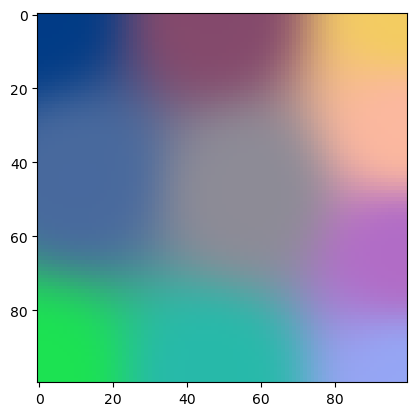

In [1]:
# kohonen.py
import matplotlib.pyplot as plt
import numpy as np

def train(input_data, n_max_iterations, width, height):
    σ0 = max(width, height) / 2
    α0 = 0.1
    weights = np.random.random((width, height, 3))
    λ = n_max_iterations / np.log(σ0)
    for t in range(n_max_iterations):
        σt = σ0 * np.exp(-t/λ)
        αt = α0 * np.exp(-t/λ)
        for vt in input_data:
            bmu = np.argmin(np.sum((weights - vt) ** 2, axis=2))
            bmu_x, bmu_y = np.unravel_index(bmu, (width, height))
            for x in range(width):
                for y in range(height):
                    di = np.sqrt(((x - bmu_x) ** 2) + ((y - bmu_y) ** 2))
                    θt = np.exp(-(di ** 2) / (2*(σt ** 2)))
                    weights[x, y] += αt * θt * (vt - weights[x, y])
    return weights

if __name__ == '__main__':
    # Set seed 
    np.random.seed(99)
    
    # Generate data
    input_data = np.random.random((10,3))
    image_data = train(input_data, 100, 10, 10)

    fig = plt.subplots()
    plt.imsave('100.png', image_data)
    plt.imshow(image_data)

    # Generate data
    input_data = np.random.random((10,3))
    image_data = train(input_data, 1000, 100, 100)

    fig = plt.subplots()
    plt.imsave('1000.png', image_data)
    plt.imshow(image_data)


## Utilizing Vector Operations

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def train(input_data, n_max_iterations, width, height):
    rx = np.arange(width)
    ry = np.arange(height) 
    xx, yy = np.meshgrid(rx, ry)
    xx = xx.astype(float)
    yy = yy.astype(float)
    σ0 = max(width, height) / 2
    α0 = 0.1
    weights = np.random.random((width, height, 3))
    λ = n_max_iterations / np.log(σ0)
    for t in range(n_max_iterations):
        σt = σ0 * np.exp(-t/λ)
        αt = α0 * np.exp(-t/λ)
        for vt in input_data:
            bmu = np.linalg.norm(np.subtract(weights, vt), axis=-1).argmin()
            bmu_x, bmu_y = np.unravel_index(bmu, (width, height))
            d = 2*σt*σt
            ax = -np.power(xx-bmu_x, 2)
            ay = -np.power(yy-bmu_y, 2)
            g = αt * np.exp((ax + ay).T/d)
            weights += np.einsum('ij, ijk->ijk', g, vt-weights)
    return weights

if __name__ == '__main__':
    
    # Set seed 
    np.random.seed(99)
    
    # Generate data
    input_data = np.random.random((10,3))
    image_data = train(input_data, 100, 10, 10)
  
    fig = plt.subplots()
    plt.imsave('100.png', image_data)
    plt.imshow(image_data)

    # Generate data
    input_data = np.random.random((10,3))
    image_data = train(input_data, 1000, 100, 100)

    fig = plt.subplots()
    plt.imsave('1000.png', image_data)
    plt.imshow(image_data)

## Refactoring the Code to Increase Modularity

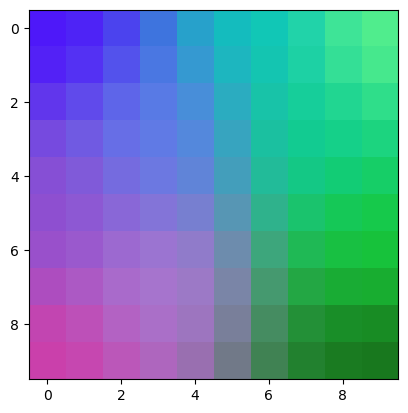

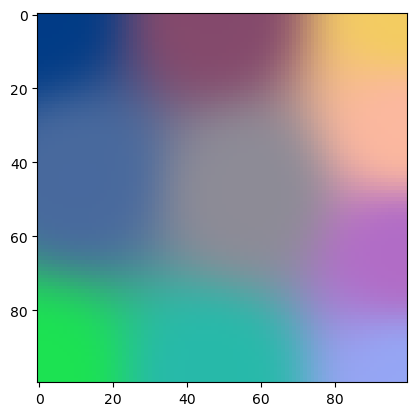

In [2]:
from typing import Tuple
import matplotlib.pyplot as plt
import numpy as np

class SOM():

    def __init__(self, 
             input_data: np.ndarray, 
             n_max_iterations: int, 
             width: int, 
             height: int,
             initial_lr: float) -> None:
        """
        Initialize the SOM (Self-Organizing Map) with given parameters.

        Args:
            input_data (np.ndarray): The input data for training the SOM.
            n_max_iterations (int): The maximum number of iterations for training.
            width (int): The width of the SOM grid.
            height (int): The height of the SOM grid.
            initial_lr (float): The initial learning rate.
            
        Returns:
            None
        """
        # Store the input data for training
        self._data = input_data
        # Set the maximum number of iterations for training
        self._n_iters = n_max_iterations
        # Set the width of the SOM grid
        self._w = width
        # Set the height of the SOM grid
        self._h = height
        # Set the initial learning rate
        self._lr_0 = initial_lr
        # Calculate the initial neighborhood radius (half the maximum dimension)
        self._neigh_rad_0 = max(width, height) / 2
        # Calculate the time constant for learning rate decay
        self._lmbda = n_max_iterations / np.log(self._neigh_rad_0)
        # Initialize the weights randomly in a 3D array (width x height x 3)
        self._weights = np.random.random((width, height, input_data.shape[1]))
        # Initialize the mesh grid for the SOM
        self._xx, self._yy = self._init_mesh(width, height)

    
    def _init_mesh(self, 
               width: int,
               height: int
               ) -> np.ndarray:
        """
        Initialize a mesh grid for the given width and height.
        
        Args:
            width (int): The width of the grid.
            height (int): The height of the grid.
            
        Returns:
            np.ndarray: Two 2D arrays representing the x and y coordinates of the grid points.
        """
        # Create a range of values for the width
        rx = np.arange(width)
        # Create a range of values for the height
        ry = np.arange(height) 

        # Create a mesh grid from the ranges
        xx, yy = np.meshgrid(rx, ry)

        # Convert the mesh grid to float type
        xx = xx.astype(float)
        yy = yy.astype(float)

        # Return the mesh grid as two 2D arrays for x and y coordinates
        return xx, yy
    
    def _update_neighborhood_radius(self, 
                                t: int
                                ) -> float:
        """
        Update the neighborhood radius based on the current iteration.
        
        Args:
            t (int): The current iteration number.
            
        Returns:
            float: The updated neighborhood radius.
        """
        # Calculate the updated neighborhood radius using the exponential decay formula
        # self.neigh_rad_0 is the initial neighborhood radius
        # t is the current iteration
        # self.lmbda is the constant that controls the decay rate
        return self._neigh_rad_0 * np.exp(-t / self._lmbda)
    
    def _update_learning_rate(self,
                          t: int
                          ) -> float:
        """
        Update the learning rate based on the current iteration.
        
        Args:
            t (int): The current iteration number.
            
        Returns:
            float: The updated learning rate.
        """
        # Calculate the updated learning rate using the exponential decay formula
        # self.lr_0 is the initial learning rate
        # t is the current iteration
        # self.lmbda is the constant that controls the decay rate
        return self._lr_0 * np.exp(-t / self._lmbda)
    
    def _find_bmu(self,
              input: np.ndarray
              ) -> Tuple[np.int64, np.int64]:
        """
        Find the Best Matching Unit (BMU) for a given input vector.

        Args:
            input (np.ndarray): The input vector for which the BMU is to be found.
            
        Returns:
            Tuple[int, int]: The coordinates (x, y) of the BMU in the weight matrix.
        """
        # Calculate the Euclidean distance between the input vector and all weight vectors
        bmu = np.linalg.norm(np.subtract(self._weights, input), axis=-1).argmin()
        
        # Find the index of the minimum distance (BMU) and convert it to 2D coordinates
        return np.unravel_index(bmu, (self._w, self._h))
    
    def _calc_influence(self,
                    lr_t: float,
                    rad_t: float,
                    bmu_x: int,
                    bmu_y: int
                    ) -> np.ndarray:
        """
        Calculate the influence of the Best Matching Unit (BMU) on its neighboring nodes.
        
        Args:
            lr_t (float): The learning rate at iteration t.
            rad_t (float): The neighborhood radius at iteration t.
            bmu_x (int): The x-coordinate of the BMU.
            bmu_y (int): The y-coordinate of the BMU.
            
        Returns:
            np.ndarray: The influence of the BMU on each node.
        """
        # Calculate the squared radius for the Gaussian function
        d = 2 * rad_t * rad_t

        # Compute the squared distance from the BMU for all nodes
        ax = -np.square(self._xx - bmu_x)
        ay = -np.square(self._yy - bmu_y)

        # Calculate the influence of the BMU using a Gaussian function
        influence = lr_t * np.exp((ax + ay).T / d)

        return influence
    
    def _update_weights(self,
                   influence: np.ndarray,
                   input: np.ndarray
                   ) -> None:
        """
        Update the weights of the nodes in the network based on the input data and the influence of the BMU.
        
        Args:
            influence (np.ndarray): The influence of the BMU on each node in the network.
            input (np.ndarray): The input data vector.
            
        Returns:
            None
        """
        # Update the weights by applying the influence to the difference between the input and the current weights
        # np.einsum is used for element-wise multiplication and summation over specified axes
        self._weights += np.einsum('ij, ijk->ijk', influence, input-self._weights)
        return 


    @property
    def weights(self) -> np.ndarray:
        """
        Getter for the weights attribute.
        
        Returns:
            np.ndarray: The current weights of the network.
        """
        return self._weights
    
    @weights.setter
    def weights(self, value: np.ndarray):
        """
        Setter for the weights attribute.

        Args:
            value (np.ndarray): The new weights to set.
        """
        self._weights = value

    
    def train(self) -> None:
        """
        Train the SOM using the given data and update the weights accordingly.
        
        Returns:
            np.ndarray: The updated weights after training.
        """
        # Iterate over the number of training iterations
        for t in range(self._n_iters):
            # Update the learning rate based on the current iteration
            lr_t = self._update_learning_rate(t)
            # Update the neighborhood radius based on the current iteration
            rad_t = self._update_neighborhood_radius(t)
            
            # Iterate over each data point in the dataset
            for vt in self._data:
                # Find the Best Matching Unit (BMU) for the current data point
                bmu_x, bmu_y = self._find_bmu(vt)
                # Calculate the influence of the BMU on the neighboring nodes
                influence = self._calc_influence(lr_t, rad_t, bmu_x, bmu_y)
                # Update the weights based on the influence and the difference between the data point and the weights
                self._update_weights(influence, vt)
        
        return 

if __name__ == '__main__':

    # Set seed
    np.random.seed(99)
    
    # Generate data
    input_data = np.random.random((10,3))
    som_ins1 = SOM(input_data, 100, 10, 10, 0.1)
    som_ins1.train()
    image_data = som_ins1.weights

    fig = plt.subplots()
    plt.imsave('100.png', image_data)
    plt.imshow(image_data)

    # Generate data
    input_data = np.random.random((10,3))
    som_ins2 = SOM(input_data, 1000, 100, 100, 0.1)
    som_ins2.train()
    image_data = som_ins2.weights

    fig = plt.subplots()
    plt.imsave('1000.png', image_data)
    plt.imshow(image_data)